In [1]:
%load_ext autoreload
%autoreload 2

## import lib 

In [2]:
import numpy as np 
import mne
import scipy as sp 
import pandas as pd 

# import plotly as py
# import plotly.graph_objs as go
# import plotly.express as px
# import plotly.io as pio
# pio.renderers.default = "browser"

import seaborn as sns 
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv("../../data/EEGArchi13mPFC.txt")
windows = 50
sampling_freq = 15_000/windows
# dans le code mathlab 250 Hz mais pas sur => car sinon analyse de 2h ce qui nous semble incohérent avec les données biologiques

df["time"] = df.index*1/sampling_freq
df = df.rename(columns={"0": "µV"})

test_r = list(df["µV"])
test_r = [np.mean(x) for x in test_r[::windows]]
test_r = pd.DataFrame(test_r)
test_r["time"] = test_r.index*1/sampling_freq

In [4]:
# px.histogram(test_r, x=0, nbins=5000)

In [5]:
eeg = test_r[0]
data = np.array([eeg])
data 

# info = mne.create_info(ch_names=['eeg'],
#                        ch_types=['eeg'],
#                        sfreq=sampling_freq)

# simulated_raw = mne.io.RawArray(data, info)
# simulated_raw.plot(show_scrollbars=False, show_scalebars=False)
# simulated_raw.plot_psd(fmax=50)
# plt.plot(test_r["time"],test_r[0])
# plt.show()

array([[ 0.,  3., -3., ...,  0.,  0.,  0.]])

Opening raw data file C:\Users\Tom\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)
Using matplotlib as 2D backend.


c:\Users\Tom\anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


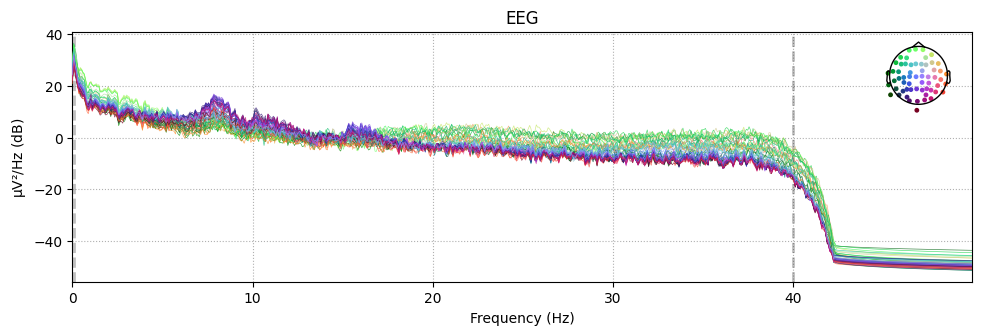

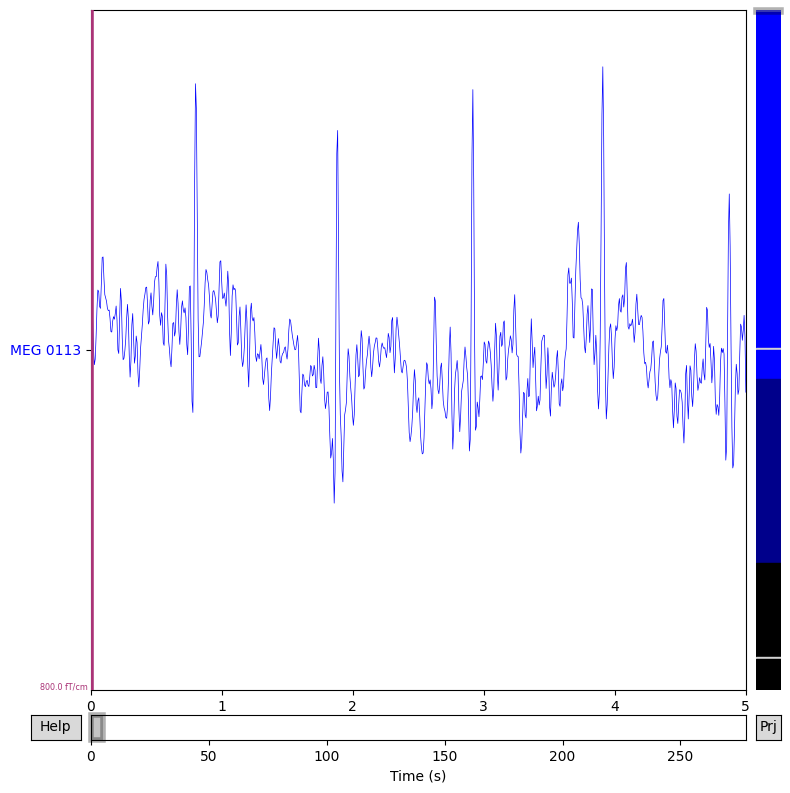

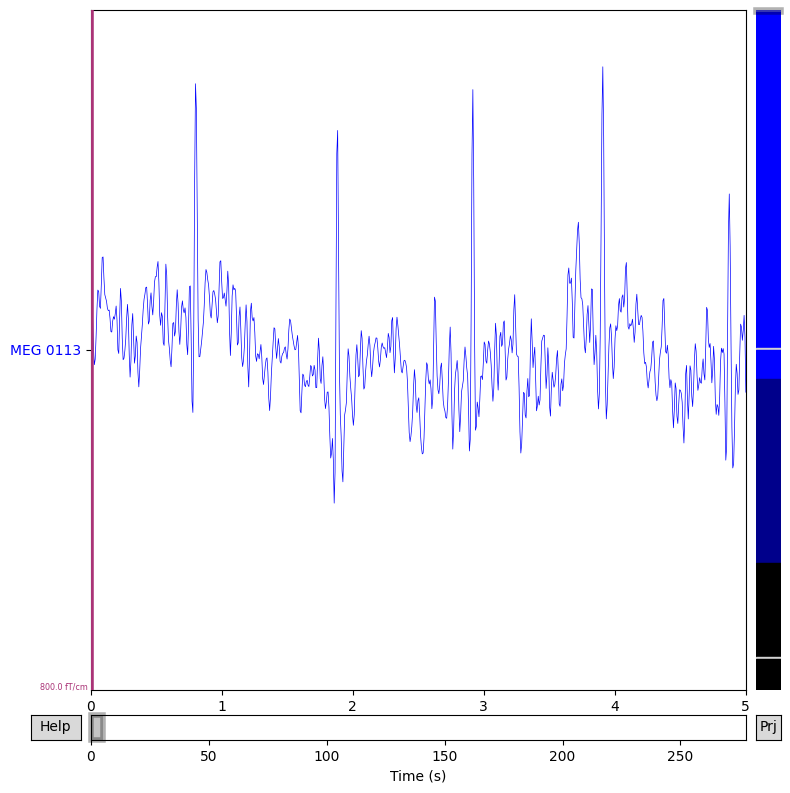

In [6]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / 'MEG' / 'sample' /
                        'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)
# raw = raw["eeg"]  
raw.plot_psd(fmax=50,picks=['eeg'])
raw.plot(duration=5, n_channels=1)

In [7]:
eeg = list(raw["eeg"][0][0])
time = list(raw["eeg"][1])
df_provided = pd.DataFrame(eeg)
df_provided["time"] = time
# px.histogram(df_provided, x=0, nbins=5000)


In [8]:
import matplotlib.pyplot as plt
eeg = df_provided[0]
data = np.array([eeg])

info = mne.create_info(ch_names=['eeg'],
                       ch_types=['eeg'],
                       sfreq=sampling_freq)

simulated_raw = mne.io.RawArray(data, info)
# simulated_raw.plot(show_scrollbars=False, show_scalebars=False)
simulated_raw.plot_psd()
# plt.plot(test_r["time"],test_r[0])
# plt.show()
plt.savefig('figures/attendu.png')

Creating RawArray with float64 data, n_channels=1, n_times=41700
    Range : 0 ... 41699 =      0.000 ...   138.997 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 6.827 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\Tom\AppData\Local\Temp\ipykernel_10280\2805330508.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  simulated_raw.plot_psd()
c:\Users\Tom\anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
